In [66]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

    @staticmethod
    def sigmoid(x):
        # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        # Computes the weighted sum of inputs Similar to Linear Regression

        return np.dot(x, theta)

    def probability(self, theta, x):
        # Calculates the probability that an instance belongs to a particular class

        return self.sigmoid(self.net_input(theta, x))

    def cost_function(self, theta, x, y):
        # Computes the cost function for all the training samples
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        # Computes the gradient of the cost function at the point theta
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        """trains the model from the training data
        Uses the fmin_tnc function that is used to find the minimum for any function
        It takes arguments as
            1) func : function to minimize
            2) x0 : initial values for the parameters
            3) fprime: gradient for the function defined by 'func'
            4) args: arguments passed to the function
        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples
        y: array-like, shape = [n_samples, n_target_values]
            Target classes
        theta: initial weights
        Returns
        -------
        self: An instance of self
        """

        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        """ Predicts the class labels
        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        predicted class labels
        """
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        """Computes the accuracy of the classifier
        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples
        actual_classes : class labels from the training data set
        probab_threshold: threshold/cutoff to categorize the samples into different classes
        Returns
        -------
        accuracy: accuracy of the model
        """
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

In [67]:

# imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

(100, 3)
(100, 1)


/var/folders/x4/s0pd9dmd2rd92wmtwszn6n6c0000gn/T/ipykernel_41802/2745182949.py:29: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


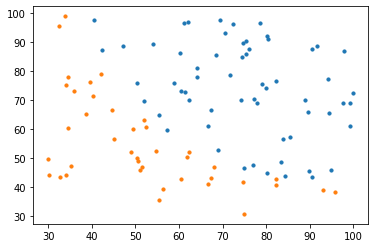

In [79]:
# load the data from the file
data = load_data("../../datasets/marks.txt", None)

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

Xold = X
yOld = y

good = X[y == 0]
bad = X[y == 1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
            label='Not Admitted')

# preparing the data for building the model
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]



theta = np.zeros((X.shape[1], 1))
print(X.shape)
print(y.shape)

In [80]:
# Logistic Regression from scratch using Gradient Descent
model = LogisticRegressionUsingGD()
model.fit(X, y, theta)
accuracy = model.accuracy(X, y.flatten())
parameters = model.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters using Gradient descent")
print("\n")
print(parameters)

The accuracy of the model is 89.0
The model parameters using Gradient descent


[-25.16131857   0.20623159   0.20147149]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631672E-01   7.89087138E-01
    2    5  5.892425282804624E-01   7.39225986E+01
    3    7  4.227824457484088E-01   1.85266387E+01
    4    9  4.072926901030192E-01   1.68671175E+01
    5   11  3.818855080452169E-01   1.07734996E+01
    6   13  3.786234926001362E-01   2.31584986E+01
tnc: stepmx = 1000
    7   16  2.389267840481995E-01   3.00821054E+00
    8   18  2.047203846975700E-01   1.52224749E-01
    9   20  2.046713872739805E-01   6.62491117E-02
   10   22  2.035303174711824E-01   9.30774550E-04
tnc: fscale = 32.7776
   11   24  2.035293533663268E-01   8.07439204E-06
   12   26  2.035251130075867E-01   1.80186473E-04
   13   28  2.034984100813270E-01   5.02750998E-04
   14   30  2.034978375526210E-01   9.87108353E-06
   15   32  2.034977903877782E-01   3.76727431E-06
   16   34  2.034977384759528E-01   1.93662199E-05
   17   36  2.034977015894747E-01   2.47309204E-13


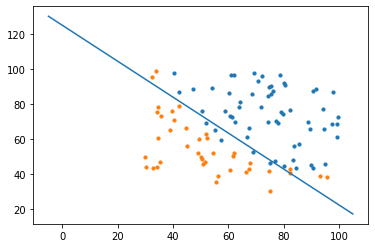

In [85]:
x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
x_values = [-5, 105]
parameters = np.array([x for x in model.w_])
#parameters = np.array([-25.16131856, 0.20623159, 0.20147149])
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
            label='Not Admitted')
plt.plot(x_values, y_values)
plt.show()

(100, 3)
(100, 1)


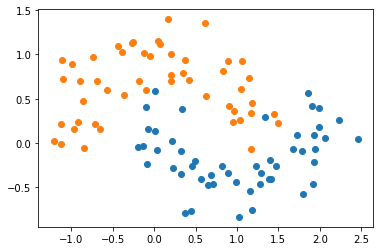

In [86]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

good = X[y == 0]
bad = X[y == 1]
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]

print(X.shape)
print(y.shape)
theta = np.zeros((X.shape[1], 1))


In [87]:
model.fit(X, y, theta)
accuracy = model.accuracy(X, y.flatten())
parameters = model.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters using Gradient descent")
print("\n")
print(parameters)

The accuracy of the model is 88.0
The model parameters using Gradient descent


[ 0.65341231  1.26127513 -6.0591431 ]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   1.01307161E-01
    1    3  4.376719681693201E-01   1.95107219E-02
    2    8  3.387006356877366E-01   7.24632294E-03
    3   12  2.947026686866436E-01   3.45131329E-03
    4   14  2.804614965092776E-01   1.81609810E-03
tnc: fscale = 23.4655
    5   16  2.673117121501729E-01   1.10220935E-03
    6   18  2.592356321417098E-01   1.52907786E-04
    7   20  2.563250841677192E-01   3.71319443E-05
    8   22  2.554835227312555E-01   1.30019846E-04
    9   24  2.546327090078388E-01   1.12818137E-06
tnc: fscale = 941.479
   10   26  2.546202840658785E-01   1.17559209E-07
   11   28  2.546194377101078E-01   3.29655537E-08
   12   30  2.546180805666284E-01   2.76853017E-11
tnc: fscale = 190053
tnc: |fn-fn-1] = 2.35266e-10 -> convergence
   13   32  2.546180803313622E-01   9.62387719E-12
tnc: Converged (|f_n-f_(n-1)| ~= 0)


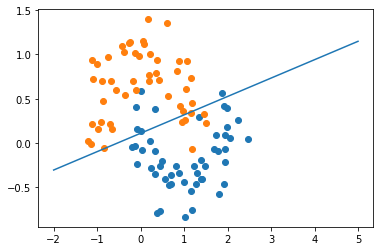

In [93]:
x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
x_values = [-2, 5]
parameters = np.array([x for x in model.w_])
#parameters = np.array([-25.16131856, 0.20623159, 0.20147149])
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

# plots

#plt.xlim([-1.5, 2.5])
#plt.ylim([-0.75, 1.25])
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])
plt.plot(x_values, y_values)
plt.show()

(100, 3)
(100, 1)


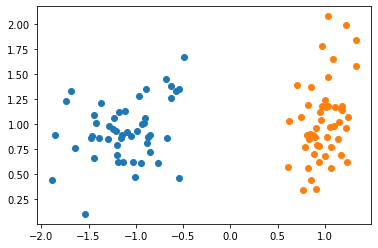

In [94]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

good = X[y == 0]
bad = X[y == 1]
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]

print(X.shape)
print(y.shape)
theta = np.zeros((X.shape[1], 1))


In [95]:
model.fit(X, y, theta)
accuracy = model.accuracy(X, y.flatten())
parameters = model.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters using Gradient descent")
print("\n")
print(parameters)

The accuracy of the model is 100.0
The model parameters using Gradient descent


[ -0.69820229 -18.19178246  -0.47362695]


  NIT   NF   F                       GTG
/var/folders/x4/s0pd9dmd2rd92wmtwszn6n6c0000gn/T/ipykernel_41802/2665942545.py:27: RuntimeWarning: divide by zero encountered in log
  y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
    0    1  6.931471805599453E-01   2.76196456E-01
tnc: stepmx = 1000
    1    4  5.487671321423586E-04   5.93245728E-07
tnc: fscale = 1298.32
    2    9  2.543482875614347E-04   5.22736439E-08
    3   13  1.214120323823149E-04   3.62109447E-08
    4   16  3.254781600895334E-05   2.47931876E-09
    5   19  1.106901311356887E-05   3.83982320E-10
tnc: fscale = 51032.2
/var/folders/x4/s0pd9dmd2rd92wmtwszn6n6c0000gn/T/ipykernel_41802/2665942545.py:27: RuntimeWarning: invalid value encountered in multiply
  y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
    5   84  1.106901311356887E-05   3.83982320E-10
tnc: Linear search failed


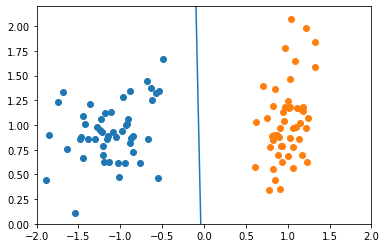

In [98]:
x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
x_values = [-2, 5]
parameters = np.array([x for x in model.w_])
#parameters = np.array([-25.16131856, 0.20623159, 0.20147149])
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

# plots

plt.xlim([-2,2])
plt.ylim([0,2.2])
plt.scatter(bad[:,0], bad[:,1])
plt.scatter(good[:,0], good[:,1])
plt.plot(x_values, y_values)
plt.show()